# Demo

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight', 'dpi': 110}
%load_ext autoreload
%autoreload 2

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
import muse_inference
from muse_inference import MuseProblem
import numpy as np

In [3]:
θ_true = 1.
(θ1_true, θ2_true) = (-1., 2.)

## With numpy

### Scalar

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.normal(size=self.N) * np.exp(θ/2)
        x = z + rng.normal(size=self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def gradθ_and_hessθ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = prob.solve(0, rng=np.random.SeedSequence(0), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  7%|▋         | 68/1010 [00:00<00:01, 678.04it/s]

 13%|█▎        | 136/1010 [00:00<00:01, 643.51it/s]

 20%|██        | 203/1010 [00:00<00:01, 631.20it/s]

 28%|██▊       | 281/1010 [00:00<00:01, 685.35it/s]

 35%|███▍      | 352/1010 [00:00<00:00, 692.60it/s]

 42%|████▏     | 424/1010 [00:00<00:00, 699.51it/s]

 50%|████▉     | 501/1010 [00:00<00:00, 720.91it/s]

 57%|█████▋    | 575/1010 [00:00<00:00, 725.67it/s]

 64%|██████▍   | 648/1010 [00:00<00:00, 723.38it/s]

 71%|███████▏  | 721/1010 [00:01<00:00, 724.74it/s]

 79%|███████▉  | 802/1010 [00:01<00:00, 748.61it/s]

 87%|████████▋ | 877/1010 [00:01<00:00, 742.48it/s]

 94%|█████████▍| 952/1010 [00:01<00:00, 739.03it/s]

100%|██████████| 1010/1010 [00:01<00:00, 718.88it/s]

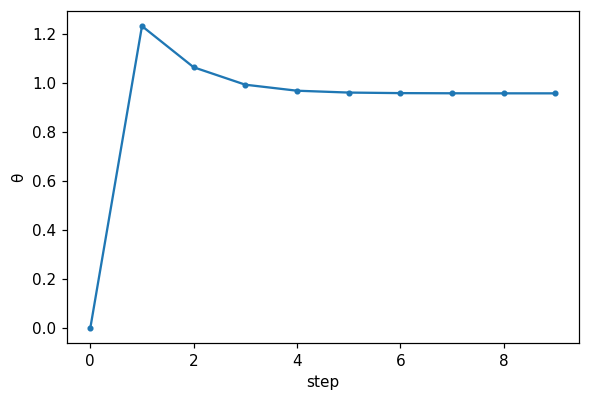

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [8]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        (θ1, θ2) = θ
        z1 = rng.normal(size=self.N) * np.exp(θ1/2)
        z2 = rng.normal(size=self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.normal(size=self.N)
        x2 = z2 + rng.normal(size=self.N)        
        return ((x1,x2), (z1,z2))
    
    def gradθ_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        return (np.sum(z1**2)/(2*np.exp(θ1)) - self.N/2, np.sum(z2**2)/(2*np.exp(θ2)) - self.N/2)
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        logLike = -(np.sum((x1 - z1)**2) + np.sum(z1**2) / np.exp(θ1) + 512*θ1) / 2 -(np.sum((x2 - z2)**2) + np.sum(z2**2) / np.exp(θ2) + 512*θ2) / 2
        gradz_logLike = (x1 - z1 * (1 + np.exp(-θ1)), x2 - z2 * (1 + np.exp(-θ2)))
        return (logLike, gradz_logLike)
    
    def gradθ_and_hessθ_logPrior(self, θ):
        (θ1, θ2) = θ
        g = (-θ1/(3**2), -θ2/(3**2))
        H = ((-1/3**2, 0),
              (0,      -1/3**2))
        return g, H

In [9]:
prob = NumpyFunnelMuseProblem(2048)
rng = np.random.RandomState(0)
x, z = prob.sample_x_z(rng, (θ1_true, θ2_true))
prob.x = x

In [10]:
result = prob.solve((0,0), α=0.7, rng=np.random.SeedSequence(0), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  1%|          | 10/1010 [00:00<00:10, 93.64it/s]

  3%|▎         | 26/1010 [00:00<00:07, 129.10it/s]

  4%|▍         | 42/1010 [00:00<00:06, 140.83it/s]

  6%|▌         | 58/1010 [00:00<00:06, 147.10it/s]

  7%|▋         | 73/1010 [00:00<00:07, 132.74it/s]

  9%|▉         | 89/1010 [00:00<00:06, 139.96it/s]

 10%|█         | 104/1010 [00:00<00:06, 130.66it/s]

 12%|█▏        | 118/1010 [00:00<00:06, 127.61it/s]

 13%|█▎        | 131/1010 [00:01<00:07, 113.60it/s]

 14%|█▍        | 143/1010 [00:01<00:07, 114.81it/s]

 15%|█▌        | 155/1010 [00:01<00:07, 115.86it/s]

 17%|█▋        | 167/1010 [00:01<00:07, 116.72it/s]

 18%|█▊        | 179/1010 [00:01<00:07, 106.47it/s]

 19%|█▉        | 191/1010 [00:01<00:07, 110.04it/s]

 20%|██        | 203/1010 [00:01<00:07, 104.77it/s]

 21%|██        | 214/1010 [00:01<00:08, 98.63it/s] 

 22%|██▏       | 227/1010 [00:01<00:07, 106.45it/s]

 24%|██▎       | 238/1010 [00:02<00:07, 98.35it/s] 

 25%|██▍       | 251/1010 [00:02<00:07, 105.44it/s]

 26%|██▌       | 264/1010 [00:02<00:06, 110.52it/s]

 27%|██▋       | 277/1010 [00:02<00:06, 114.24it/s]

 29%|██▊       | 290/1010 [00:02<00:06, 117.03it/s]

 30%|██▉       | 302/1010 [00:02<00:06, 105.84it/s]

 31%|███       | 313/1010 [00:02<00:06, 103.39it/s]

 32%|███▏      | 326/1010 [00:02<00:06, 109.43it/s]

 34%|███▎      | 339/1010 [00:02<00:05, 114.63it/s]

 35%|███▍      | 352/1010 [00:03<00:05, 117.53it/s]

 36%|███▌      | 364/1010 [00:03<00:06, 107.03it/s]

 37%|███▋      | 377/1010 [00:03<00:05, 111.93it/s]

 39%|███▊      | 390/1010 [00:03<00:05, 116.51it/s]

 40%|███▉      | 403/1010 [00:03<00:05, 119.83it/s]

 41%|████      | 416/1010 [00:03<00:05, 105.30it/s]

 43%|████▎     | 430/1010 [00:03<00:05, 113.03it/s]

 44%|████▍     | 444/1010 [00:03<00:04, 119.96it/s]

 45%|████▌     | 457/1010 [00:03<00:04, 114.40it/s]

 47%|████▋     | 471/1010 [00:04<00:04, 120.93it/s]

 48%|████▊     | 485/1010 [00:04<00:04, 115.35it/s]

 49%|████▉     | 499/1010 [00:04<00:04, 120.42it/s]

 51%|█████     | 512/1010 [00:04<00:04, 105.86it/s]

 52%|█████▏    | 526/1010 [00:04<00:04, 113.63it/s]

 53%|█████▎    | 538/1010 [00:04<00:04, 109.65it/s]

 55%|█████▍    | 552/1010 [00:04<00:03, 116.30it/s]

 56%|█████▌    | 566/1010 [00:04<00:03, 120.53it/s]

 57%|█████▋    | 580/1010 [00:05<00:03, 124.84it/s]

 59%|█████▊    | 593/1010 [00:05<00:03, 125.70it/s]

 60%|██████    | 606/1010 [00:05<00:03, 115.39it/s]

 61%|██████    | 618/1010 [00:05<00:03, 114.36it/s]

 63%|██████▎   | 633/1010 [00:05<00:03, 122.78it/s]

 64%|██████▍   | 646/1010 [00:05<00:03, 116.13it/s]

 65%|██████▌   | 661/1010 [00:05<00:02, 124.58it/s]

 67%|██████▋   | 676/1010 [00:05<00:02, 130.74it/s]

 68%|██████▊   | 690/1010 [00:05<00:02, 121.46it/s]

 70%|██████▉   | 704/1010 [00:06<00:02, 116.78it/s]

 71%|███████   | 716/1010 [00:06<00:02, 115.25it/s]

 72%|███████▏  | 728/1010 [00:06<00:02, 111.32it/s]

 74%|███████▎  | 743/1010 [00:06<00:02, 121.12it/s]

 75%|███████▌  | 758/1010 [00:06<00:01, 129.04it/s]

 77%|███████▋  | 773/1010 [00:06<00:01, 134.45it/s]

 78%|███████▊  | 788/1010 [00:06<00:01, 138.42it/s]

 79%|███████▉  | 802/1010 [00:06<00:01, 127.33it/s]

 81%|████████  | 815/1010 [00:06<00:01, 123.47it/s]

 82%|████████▏ | 830/1010 [00:07<00:01, 130.38it/s]

 84%|████████▍ | 846/1010 [00:07<00:01, 136.29it/s]

 85%|████████▌ | 860/1010 [00:07<00:01, 126.80it/s]

 87%|████████▋ | 876/1010 [00:07<00:01, 133.47it/s]

 88%|████████▊ | 892/1010 [00:07<00:00, 139.28it/s]

 90%|████████▉ | 907/1010 [00:07<00:00, 130.03it/s]

 91%|█████████ | 921/1010 [00:07<00:00, 126.50it/s]

 93%|█████████▎| 937/1010 [00:07<00:00, 134.00it/s]

 94%|█████████▍| 951/1010 [00:07<00:00, 126.25it/s]

 96%|█████████▌| 967/1010 [00:08<00:00, 133.43it/s]

 97%|█████████▋| 981/1010 [00:08<00:00, 125.71it/s]

 99%|█████████▊| 997/1010 [00:08<00:00, 133.00it/s]

100%|██████████| 1010/1010 [00:08<00:00, 119.71it/s]

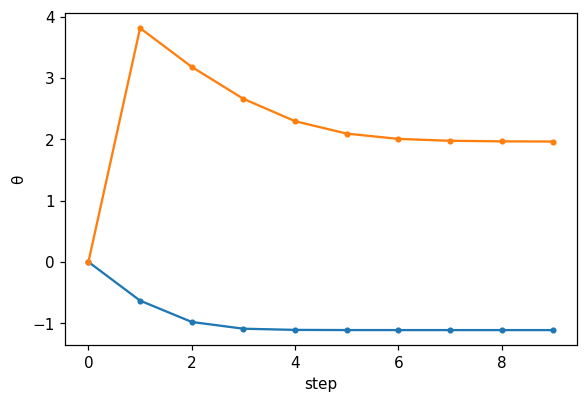

In [11]:
plt.plot([h["θ"][0] for h in result.history], ".-")
plt.plot([h["θ"][1] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");

## With Jax

In [12]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem, JaxMuseProblem

### Scalar

In [13]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, key, θ):
        keys = jax.random.split(key, 2)
        z = jax.random.normal(keys[0], (self.N,)) * np.exp(θ/2)
        x = z + jax.random.normal(keys[1], (self.N,))
        return (x, z)

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)

In [14]:
prob = JaxFunnelMuseProblem(512)
key = jax.random.PRNGKey(0)
(x, z) = prob.sample_x_z(key, θ_true)
prob.x = x

In [15]:
result = prob.solve(0., α=0.7, rng=jax.random.PRNGKey(1), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<39:59,  2.38s/it]

 10%|█         | 102/1010 [00:05<00:42, 21.40it/s]

 20%|██        | 203/1010 [00:06<00:18, 43.69it/s]

 30%|███       | 304/1010 [00:06<00:10, 70.57it/s]

 40%|████      | 405/1010 [00:06<00:06, 99.06it/s]

 50%|█████     | 506/1010 [00:07<00:03, 128.13it/s]

 60%|██████    | 607/1010 [00:07<00:02, 155.57it/s]

 70%|███████   | 708/1010 [00:08<00:01, 177.70it/s]

 80%|████████  | 809/1010 [00:08<00:01, 195.63it/s]

100%|██████████| 1010/1010 [00:08<00:00, 277.60it/s]

100%|██████████| 1010/1010 [00:08<00:00, 114.75it/s]

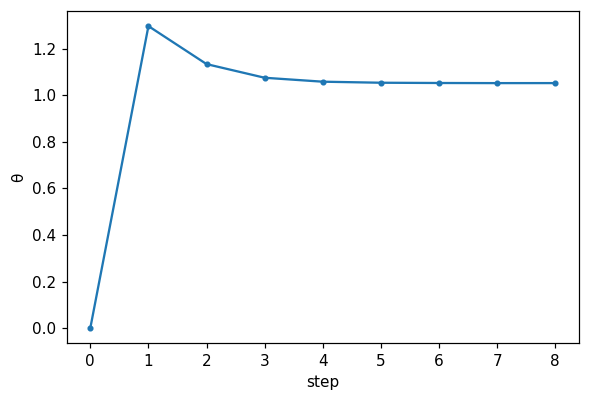

In [16]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [17]:
class JaxFunnelMuseProblem(muse_inference.jax.JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, key, θ):
        (θ1, θ2) = (θ["θ1"], θ["θ2"])
        keys = jax.random.split(key, 4)
        z1 = jax.random.normal(keys[0], (self.N,)) * np.exp(θ1/2)
        z2 = jax.random.normal(keys[1], (self.N,)) * np.exp(θ2/2)        
        x1 = z1 + jax.random.normal(keys[2], (self.N,))
        x2 = z2 + jax.random.normal(keys[3], (self.N,))        
        return ({"x1":x1, "x2":x2}, {"z1":z1, "z2":z2})

    def logLike(self, x, z, θ):
        return (
            -(jnp.sum((x["x1"] - z["z1"])**2) + jnp.sum(z["z1"]**2) / jnp.exp(θ["θ1"]) + 512*θ["θ1"]) / 2
            -(jnp.sum((x["x2"] - z["z2"])**2) + jnp.sum(z["z2"]**2) / jnp.exp(θ["θ2"]) + 512*θ["θ2"]) / 2
        )
    
    def logPrior(self, θ):
        return -θ["θ1"]**2 / (2*3**2) - θ["θ2"]**2 / (2*3**2)

In [18]:
prob = JaxFunnelMuseProblem(512)
key = jax.random.PRNGKey(0)
(x, z) = prob.sample_x_z(key, {"θ1":θ1_true, "θ2":θ2_true})
prob.x = x

In [19]:
result = prob.solve(θ_start={"θ1":0., "θ2":0.}, rng=jax.random.PRNGKey(0), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<49:13,  2.93s/it]

 10%|█         | 102/1010 [00:07<00:56, 16.11it/s]

 20%|██        | 203/1010 [00:08<00:25, 31.20it/s]

 30%|███       | 304/1010 [00:09<00:14, 47.95it/s]

 40%|████      | 405/1010 [00:09<00:09, 64.25it/s]

 50%|█████     | 506/1010 [00:10<00:06, 80.09it/s]

 60%|██████    | 607/1010 [00:11<00:04, 93.12it/s]

 70%|███████   | 708/1010 [00:11<00:02, 104.27it/s]

 80%|████████  | 809/1010 [00:12<00:01, 112.67it/s]

 90%|█████████ | 910/1010 [00:13<00:00, 119.51it/s]

100%|██████████| 1010/1010 [00:13<00:00, 74.53it/s]

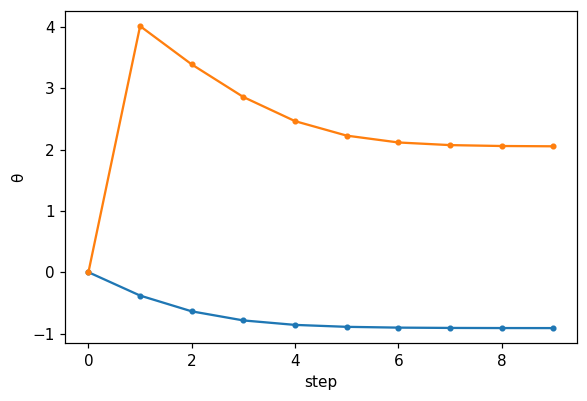

In [20]:
plt.plot([h["θ"]["θ1"] for h in result.history], ".-")
plt.plot([h["θ"]["θ2"] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [21]:
import sys
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

### Scalar

In [22]:
# define 
def gen_funnel(x=None, θ=None, rng=None):
    with pm.Model(rng_seeder=rng) as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true, rng=rng)).prior.x[0,0]

# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [23]:
result = prob.solve(0., rng=np.random.SeedSequence(0), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  6%|▌         | 57/1010 [00:00<00:01, 566.63it/s]

 11%|█▏        | 114/1010 [00:00<00:03, 287.43it/s]

 17%|█▋        | 174/1010 [00:00<00:02, 380.09it/s]

 22%|██▏       | 221/1010 [00:00<00:02, 277.53it/s]

 29%|██▊       | 288/1010 [00:00<00:01, 365.62it/s]

 33%|███▎      | 335/1010 [00:01<00:02, 290.51it/s]

 40%|███▉      | 403/1010 [00:01<00:01, 369.43it/s]

 45%|████▍     | 451/1010 [00:01<00:01, 300.79it/s]

 50%|█████     | 506/1010 [00:01<00:01, 267.02it/s]

 57%|█████▋    | 574/1010 [00:01<00:01, 339.85it/s]

100%|██████████| 1010/1010 [00:01<00:00, 940.18it/s]

100%|██████████| 1010/1010 [00:01<00:00, 511.23it/s]

/home/runner/.cache/pypoetry/virtualenvs/muse-inference-8TQ0v75b-py3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


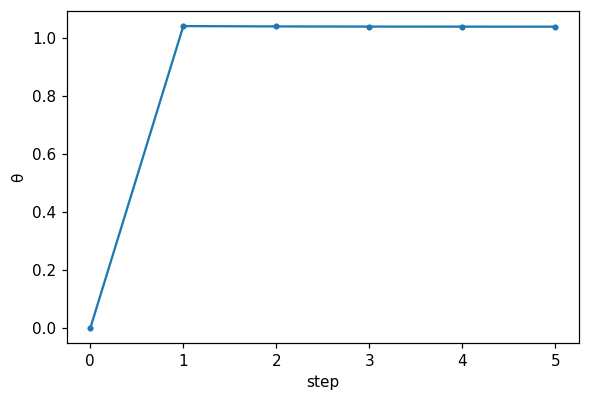

In [24]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [25]:
# define 
def gen_funnel(x=(None,None), θ=(None,None), rng_seeder=None, N=3):
    (θ1, θ2) = θ
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        θ1 = pm.Normal("θ1", 0, 3) if θ1 is None else θ1
        θ2 = pm.Normal("θ2", 0, 3) if θ2 is None else θ2
        z1 = pm.Normal("z1", 0, np.exp(θ1 / 2), size=N)
        z2 = pm.Normal("z2", 0, np.exp(θ2 / 2), size=N)
        x1 = pm.Normal("x1", z1, 1, observed=x[0])
        x2 = pm.Normal("x2", z2, 1, observed=x[1])
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
prior = pm.sample_prior_predictive(1, model=gen_funnel(θ=(θ1_true,θ2_true), rng_seeder=rng)).prior
x_obs = (prior.x1, prior.x2)

In [26]:
# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [27]:
result = prob.solve((0,0), α=0.3, rng=np.random.SeedSequence(0), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▉         | 90/1010 [00:00<00:01, 894.84it/s]

 18%|█▊        | 180/1010 [00:00<00:03, 251.13it/s]

 22%|██▏       | 227/1010 [00:01<00:04, 172.94it/s]

 30%|███       | 304/1010 [00:01<00:04, 166.37it/s]

 39%|███▉      | 393/1010 [00:01<00:02, 248.60it/s]

 44%|████▎     | 441/1010 [00:02<00:02, 191.09it/s]

 50%|█████     | 506/1010 [00:02<00:02, 172.58it/s]

 59%|█████▉    | 595/1010 [00:02<00:01, 249.29it/s]

 64%|██████▎   | 643/1010 [00:03<00:01, 190.88it/s]

 70%|███████   | 708/1010 [00:03<00:01, 172.04it/s]

 79%|███████▉  | 797/1010 [00:03<00:00, 246.35it/s]

 84%|████████▎ | 845/1010 [00:04<00:00, 192.28it/s]

 90%|█████████ | 910/1010 [00:04<00:00, 175.34it/s]

 99%|█████████▉| 1001/1010 [00:04<00:00, 251.80it/s]

100%|██████████| 1010/1010 [00:04<00:00, 215.00it/s]

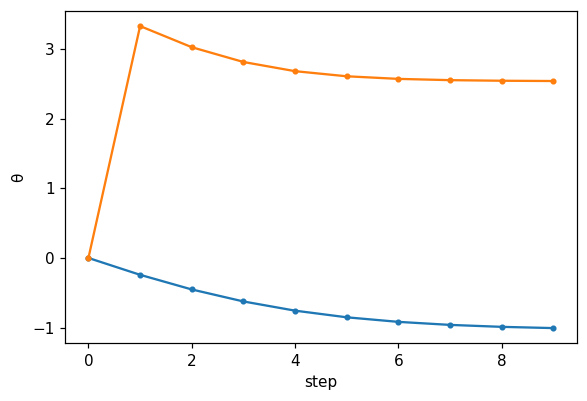

In [28]:
plt.plot([h["θ"][0] for h in result.history], ".-")
plt.plot([h["θ"][1] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");